## LOADING THE DOWNLOADED DATASET

In [1]:
# INSTALLING THE REQUIRED PACKAGES
library("tidyverse")

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.7     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
# lOADING THE DATASET USING read_csv()
covid <- read_csv("CovidDeaths.csv")

Rows: 85171 Columns: 59
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (5): iso_code, continent, location, date, tests_units
dbl (54): total_cases, new_cases, new_cases_smoothed, total_deaths, new_deat...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# VIEWING THE FIRST SIX ROWS USING head() function
head(covid)

iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,⋯,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AFG,Asia,Afghanistan,2/24/2020,1,1,NA,NA,NA,NA,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2/25/2020,1,0,NA,NA,NA,NA,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2/26/2020,1,0,NA,NA,NA,NA,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2/27/2020,1,0,NA,NA,NA,NA,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2/28/2020,1,0,NA,NA,NA,NA,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2/29/2020,1,0,0.143,NA,NA,0,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511


#### BEFORE MOVING FURTHER WE CAN USE THE BOXPLOT TO VISUALIZE THE POPULATION OF EACH CONTINENTS


In [4]:
# DROPPING CONTINENTS WITH NA VALUES
covid <- covid %>% drop_na(continent)

Warning message:
"Removed 100 rows containing non-finite values (stat_boxplot)."


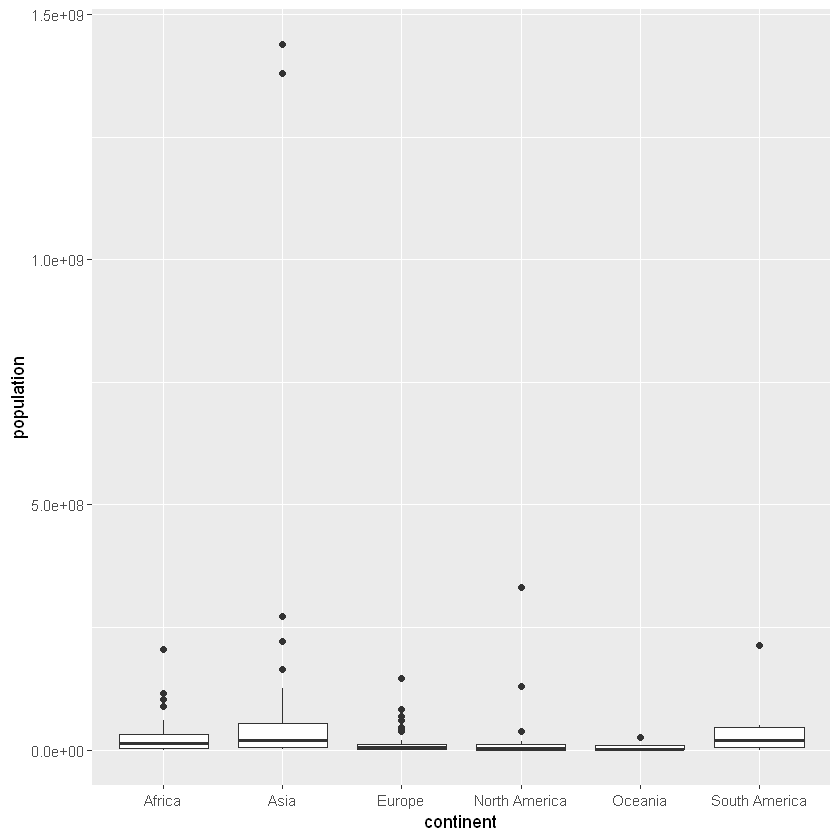

In [5]:
ggplot(covid, aes(x=continent,y=population)) + geom_boxplot()

In [6]:
# VIEWING THE STRUCTURE OF THE DATASET
glimpse(covid)

Rows: 81,060
Columns: 59
$ iso_code                              <chr> "AFG", "AFG", "AFG", "AFG", "AFG~
$ continent                             <chr> "Asia", "Asia", "Asia", "Asia", ~
$ location                              <chr> "Afghanistan", "Afghanistan", "A~
$ date                                  <chr> "2/24/2020", "2/25/2020", "2/26/~
$ total_cases                           <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 4,~
$ new_cases                             <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,~
$ new_cases_smoothed                    <dbl> NA, NA, NA, NA, NA, 0.143, 0.143~
$ total_deaths                          <dbl> NA, NA, NA, NA, NA, NA, NA, NA, ~
$ new_deaths                            <dbl> NA, NA, NA, NA, NA, NA, NA, NA, ~
$ new_deaths_smoothed                   <dbl> NA, NA, NA, NA, NA, 0, 0, 0, 0, ~
$ total_cases_per_million               <dbl> 0.026, 0.026, 0.026, 0.026, 0.02~
$ new_cases_per_million                 <dbl> 0.026, 0.000, 0.000, 0.000, 0.00~
$ new_cases_smo

## PRE-PROCESSING OF THE DATA

In [7]:
# GETTING A SUMMARY OF THE DATASET WITH THE summary
summary(covid)

   iso_code          continent           location             date          
 Length:81060       Length:81060       Length:81060       Length:81060      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
  total_cases         new_cases      new_cases_smoothed  total_deaths   
 Min.   :       1   Min.   :-74347   Min.   : -6223.0   Min.   :     1  
 1st Qu.:     888   1st Qu.:     2   1st Qu.:     6.4   1st Qu.:    42  
 Median :    9139   Median :    60   Median :    74.1   Median :   272  
 Mean   :  272988   Mean   :  1907   Mean   :  1897.2   Mean   :  7578  
 3rd Qu.:   92519  

In [8]:
# CHECKING THE UNIQUE CONTINENTS USING THE unique() function
unique(covid$continent)

[1] "Asia"          "Europe"        "Africa"        "North America"
[5] "South America" "Oceania"

###### SELECTING  EUROPE CONTINENT and VARIABLES WHICH ARE date,iso_code, continent,location,total_cases,new_cases,total_deaths, new_deaths,total_vaccinations,people_vaccinated,new_vaccinations,population WHILE EXCLUDING 'ITALY' ,'GIBRALTAR'AND 'SPAIN' ROWS

In [9]:
covid_Europe <- covid %>%  filter(continent=='Europe') %>% 
select(date,iso_code, continent,location,total_cases,total_deaths,new_cases,new_deaths,total_vaccinations
       ,people_vaccinated,population)%>% 
filter(location != 'Italy', location != 'Spain', location != 'Gibraltar')
tail(covid_Europe)

date,iso_code,continent,location,total_cases,total_deaths,new_cases,new_deaths,total_vaccinations,people_vaccinated,population
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4/25/2021,VAT,Europe,Vatican,27,NA,0,NA,NA,NA,809
4/26/2021,VAT,Europe,Vatican,27,NA,0,NA,NA,NA,809
4/27/2021,VAT,Europe,Vatican,27,NA,0,NA,NA,NA,809
4/28/2021,VAT,Europe,Vatican,27,NA,0,NA,NA,NA,809
4/29/2021,VAT,Europe,Vatican,27,NA,0,NA,NA,NA,809
4/30/2021,VAT,Europe,Vatican,27,NA,0,NA,NA,NA,809


In [10]:
# VIEWING THE STRUCTURE OF THE DATASET
glimpse(covid_Europe)

Rows: 19,407
Columns: 11
$ date               <chr> "2/25/2020", "2/26/2020", "2/27/2020", "2/28/2020",~
$ iso_code           <chr> "ALB", "ALB", "ALB", "ALB", "ALB", "ALB", "ALB", "A~
$ continent          <chr> "Europe", "Europe", "Europe", "Europe", "Europe", "~
$ location           <chr> "Albania", "Albania", "Albania", "Albania", "Albani~
$ total_cases        <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,~
$ total_deaths       <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,~
$ new_cases          <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,~
$ new_deaths         <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,~
$ total_vaccinations <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,~
$ people_vaccinated  <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,~
$ population         <dbl> 2877800, 2877800, 2877800, 2877800, 2877800, 287780~


In [11]:
# CONFIRMING THE ABSENCE OF ITALY AND SPAIN DATA
unique(covid_Europe$location)

[1] "Albania"                "Andorra"                "Austria"               
 [4] "Belarus"                "Belgium"                "Bosnia and Herzegovina"
 [7] "Bulgaria"               "Croatia"                "Cyprus"                
[10] "Czechia"                "Denmark"                "Estonia"               
[13] "Faeroe Islands"         "Finland"                "France"                
[16] "Germany"                "Greece"                 "Guernsey"              
[19] "Hungary"                "Iceland"                "Ireland"               
[22] "Isle of Man"            "Jersey"                 "Kosovo"                
[25] "Latvia"                 "Liechtenstein"          "Lithuania"             
[28] "Luxembourg"             "Malta"                  "Moldova"               
[31] "Monaco"                 "Montenegro"             "Netherlands"           
[34] "North Macedonia"        "Norway"                 "Poland"                
[37] "Portugal"               "Romania"                "Russia"                
[40] "San Marino"             "Serbia"                 "Slovakia"              
[43] "Slovenia"               "Sweden"                 "Switzerland"           
[46] "Ukraine"                "United Kingdom"         "Vatican"

In [12]:
# GET A SUMMARY OF DATASET
summary(covid_Europe)

     date             iso_code          continent           location        
 Length:19407       Length:19407       Length:19407       Length:19407      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
  total_cases       total_deaths      new_cases        new_deaths     
 Min.   :      1   Min.   :     1   Min.   :-46076   Min.   :-232.00  
 1st Qu.:   2260   1st Qu.:    86   1st Qu.:    17   1st Qu.:   0.00  
 Median :  26222   Median :   721   Median :   235   Median :   5.00  
 Mean   : 256932   Mean   :  6906   Mean   :  1973   Mean   :  46.43  
 3rd Qu.: 176626   3rd Qu.:  

#### From the summary of the dataset we can see that the date is in character mode and all numeric columns are have lots of NA values, we have to change the data type of the date column to Date and replace the NA values with 0, also the new_cases and new_deaths both have negative values.

In [13]:
# CHANGING THE NEGATIVE new_cases and new_deaths COLUMNS TO POSITIVE
covid_Europe$new_cases <-  abs(covid_Europe$new_cases)
covid_Europe$new_deaths <-  abs(covid_Europe$new_deaths)

In [14]:
# CHANGING THE DATATYPE OF THE date COLUMN USING THE as.Date() function.
covid_Europe$date <- as.Date(covid_Europe$date, "%m/%d/%Y")

In [15]:
# REPLACING THE NA VALUES, USING replace_na()
covid_Europe$total_cases <-  replace_na(covid_Europe$total_cases,0)
covid_Europe$total_deaths <-  replace_na(covid_Europe$total_deaths,0)
covid_Europe$new_cases <-  replace_na(covid_Europe$new_cases,0)
covid_Europe$new_deaths <-  replace_na(covid_Europe$new_deaths,0)
covid_Europe$total_vaccinations <-  replace_na(covid_Europe$total_vaccinations,0)
covid_Europe$people_vaccinated <-  replace_na(covid_Europe$people_vaccinated,0)


In [16]:
# GETTING THE SUMMARY
summary(covid_Europe)

      date              iso_code          continent           location        
 Min.   :2020-01-24   Length:19407       Length:19407       Length:19407      
 1st Qu.:2020-06-12   Class :character   Class :character   Class :character  
 Median :2020-09-30   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2020-09-29                                                           
 3rd Qu.:2021-01-19                                                           
 Max.   :2021-04-30                                                           
  total_cases       total_deaths      new_cases        new_deaths     
 Min.   :      0   Min.   :     0   Min.   :     0   Min.   :   0.00  
 1st Qu.:   1965   1st Qu.:    42   1st Qu.:    13   1st Qu.:   0.00  
 Median :  23774   Median :   573   Median :   213   Median :   3.00  
 Mean   : 250365   Mean   :  6268   Mean   :  1932   Mean   :  42.24  
 3rd Qu.: 166016   3rd Qu.:  4182   3rd Qu.:  1154   3rd Qu.:  23.00  
 Max.   :5677835   Ma

In [17]:
glimpse(covid_Europe)

Rows: 19,407
Columns: 11
$ date               <date> 2020-02-25, 2020-02-26, 2020-02-27, 2020-02-28, 20~
$ iso_code           <chr> "ALB", "ALB", "ALB", "ALB", "ALB", "ALB", "ALB", "A~
$ continent          <chr> "Europe", "Europe", "Europe", "Europe", "Europe", "~
$ location           <chr> "Albania", "Albania", "Albania", "Albania", "Albani~
$ total_cases        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 10, 12, 2~
$ total_deaths       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ~
$ new_cases          <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 8, 2, 11,~
$ new_deaths         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ~
$ total_vaccinations <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ people_vaccinated  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ population         <dbl> 2877800, 2877800, 2877800, 2877800, 2877800, 287780~


### STANDADIZING THE DATASET

In [18]:
# CAPITALIZING THE COLUMN NAMES
names(covid_Europe) <- toupper(names(covid_Europe))
# REMOVING WHITE SPACE
names(covid_Europe) <- str_replace_all(names(covid_Europe), " ", "")

In [19]:
glimpse(covid_Europe)

Rows: 19,407
Columns: 11
$ DATE               <date> 2020-02-25, 2020-02-26, 2020-02-27, 2020-02-28, 20~
$ ISO_CODE           <chr> "ALB", "ALB", "ALB", "ALB", "ALB", "ALB", "ALB", "A~
$ CONTINENT          <chr> "Europe", "Europe", "Europe", "Europe", "Europe", "~
$ LOCATION           <chr> "Albania", "Albania", "Albania", "Albania", "Albani~
$ TOTAL_CASES        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 10, 12, 2~
$ TOTAL_DEATHS       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ~
$ NEW_CASES          <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 8, 2, 11,~
$ NEW_DEATHS         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ~
$ TOTAL_VACCINATIONS <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ PEOPLE_VACCINATED  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ POPULATION         <dbl> 2877800, 2877800, 2877800, 2877800, 2877800, 287780~


In [20]:
head(covid_Europe)

DATE,ISO_CODE,CONTINENT,LOCATION,TOTAL_CASES,TOTAL_DEATHS,NEW_CASES,NEW_DEATHS,TOTAL_VACCINATIONS,PEOPLE_VACCINATED,POPULATION
<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-02-25,ALB,Europe,Albania,0,0,0,0,0,0,2877800
2020-02-26,ALB,Europe,Albania,0,0,0,0,0,0,2877800
2020-02-27,ALB,Europe,Albania,0,0,0,0,0,0,2877800
2020-02-28,ALB,Europe,Albania,0,0,0,0,0,0,2877800
2020-02-29,ALB,Europe,Albania,0,0,0,0,0,0,2877800
2020-03-01,ALB,Europe,Albania,0,0,0,0,0,0,2877800


## STATISTICAL QUESTIONS

Question one : is the cases of Ireland greater than that of France?

Question two : is the deathes of Moldova greater than that of Monaco?

Question three : is the cases of Bosnia and Herzegovina equals to that of Bulgaria?

Question four : is the deaths of Croatia greater than that of Cyprus?

Question five : is cases of Denmark less than that of Estonia?

### ANSWER TO QUESTION ONE
To answer this question we need to select two columns,

the location and the new_cases for each countries 

and drill it down to a row of data for Ireland and France as the 

data set contain data from year 2020 to 2021 

In [21]:
countries <- covid_Europe %>%select(LOCATION,NEW_CASES)%>%  
filter(LOCATION =='France'| LOCATION=='Ireland') %>% group_by(LOCATION)
 

In [22]:
tail(countries)

LOCATION,NEW_CASES
<chr>,<dbl>
Ireland,429
Ireland,436
Ireland,420
Ireland,368
Ireland,469
Ireland,544


In [23]:
t.test(data=countries,NEW_CASES~LOCATION)


	Welch Two Sample t-test

data:  NEW_CASES by LOCATION
t = 15.556, df = 465.73, p-value < 2.2e-16
alternative hypothesis: true difference in means between group France and group Ireland is not equal to 0
95 percent confidence interval:
 10486.05 13518.40
sample estimates:
 mean in group France mean in group Ireland 
           12585.0605              582.8337 


### ANSWER TO QUESTION TWO
To answer this question we need to select two columns,

the location and the deathes for each countries

and drill it down to a row of data for  Moldova and Monaco as the

data set contain data from year 2020 to 2021

In [24]:
countries <- covid_Europe %>%select(LOCATION,NEW_CASES)%>%  
filter(LOCATION =='Moldova'| LOCATION=='Monaco') %>% group_by(LOCATION)
 t.test(data=countries,NEW_CASES~LOCATION)


	Welch Two Sample t-test

data:  NEW_CASES by LOCATION
t = 24.154, df = 418.21, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Moldova and group Monaco is not equal to 0
95 percent confidence interval:
 544.6067 641.0994
sample estimates:
mean in group Moldova  mean in group Monaco 
           598.656325              5.803279 


In [25]:

t.test(data=countries,NEW_CASES~LOCATION)


	Welch Two Sample t-test

data:  NEW_CASES by LOCATION
t = 24.154, df = 418.21, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Moldova and group Monaco is not equal to 0
95 percent confidence interval:
 544.6067 641.0994
sample estimates:
mean in group Moldova  mean in group Monaco 
           598.656325              5.803279 


### ANSWER TO QUESTION THREE
To answer this question we need to select two columns,

the location and the new_cases for each countries 

and drill it down to a row of data for Bosnia and Herzegovina and Bulgaria as the 

data set contain data from year 2020 to 2021 


In [26]:
countries <- covid_Europe %>%select(LOCATION,NEW_CASES)%>%  
filter(LOCATION =='Bosnia and Herzegovina'| LOCATION=='Bulgaria') %>% group_by(LOCATION)
 t.test(data=countries,NEW_CASES~LOCATION)



	Welch Two Sample t-test

data:  NEW_CASES by LOCATION
t = -6.9511, df = 585.61, p-value = 9.701e-12
alternative hypothesis: true difference in means between group Bosnia and Herzegovina and group Bulgaria is not equal to 0
95 percent confidence interval:
 -634.6322 -355.0091
sample estimates:
mean in group Bosnia and Herzegovina               mean in group Bulgaria 
                            470.2867                             965.1074 


### ANSWER TO QUESTION FOUR
To answer this question we need to select two columns,

the location and the new_cases for each countries 

and drill it down to a row of data for Croatia and Cyprus as the 

data set contain data from year 2020 to 2021 


Question five : is cases of Denmark less than that of Estonia?

In [27]:
countries <- covid_Europe %>%select(LOCATION,NEW_CASES)%>%  
filter(LOCATION =='Croatia'| LOCATION=='Cyprus') %>% group_by(LOCATION)
 t.test(data=countries,NEW_CASES~LOCATION)



	Welch Two Sample t-test

data:  NEW_CASES by LOCATION
t = 11.512, df = 466.22, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Croatia and group Cyprus is not equal to 0
95 percent confidence interval:
 510.2906 720.3666
sample estimates:
mean in group Croatia  mean in group Cyprus 
             770.7262              155.3976 


### ANSWER TO QUESTION FIVE
To answer this question we need to select two columns,

the location and the new_cases for each countries 

and drill it down to a row of data for Denmark and Estonia as the 

data set contain data from year 2020 to 2021 



In [28]:
countries <- covid_Europe %>%select(LOCATION,NEW_CASES)%>%  
filter(LOCATION =='Denmark'| LOCATION=='Estonia') %>% group_by(LOCATION)
 t.test(data=countries,NEW_CASES~LOCATION)



	Welch Two Sample t-test

data:  NEW_CASES by LOCATION
t = 6.9692, df = 708.06, p-value = 7.304e-12
alternative hypothesis: true difference in means between group Denmark and group Estonia is not equal to 0
95 percent confidence interval:
 200.4887 357.7516
sample estimates:
mean in group Denmark mean in group Estonia 
             562.2269              283.1067 


### NORMALIZING THE DATASET

In [29]:
countries_norm <- covid_Europe  %>% mutate(TOTAL_CASES = (TOTAL_CASES - min(TOTAL_CASES))/(max(TOTAL_CASES) - min(TOTAL_CASES)))%>% 
mutate(TOTAL_DEATHS = (TOTAL_DEATHS - min(TOTAL_DEATHS))/(max(TOTAL_DEATHS) - min(TOTAL_DEATHS))) %>% 
mutate(POPULATION = (POPULATION - min(POPULATION))/(max(POPULATION) - min(POPULATION))) %>% 
mutate(NEW_CASES = (NEW_CASES - min(NEW_CASES))/(max(NEW_CASES) - min(NEW_CASES))) %>% 
mutate(NEW_DEATHS = (NEW_DEATHS - min(NEW_DEATHS))/(max(NEW_DEATHS) - min(NEW_DEATHS)))


#### DESCRIPTIVE STATISTICS

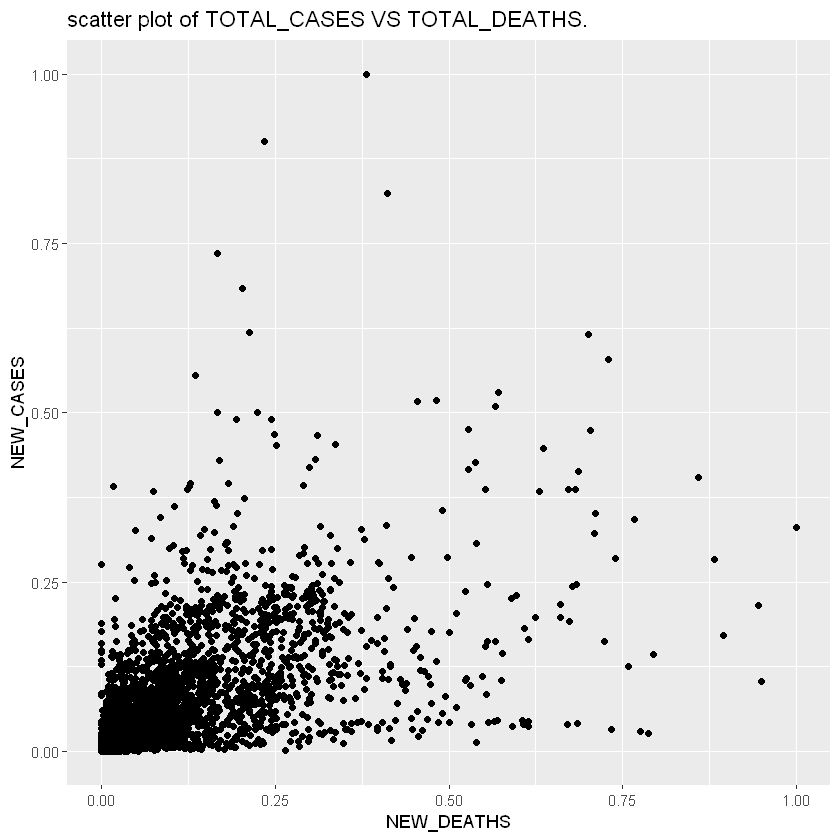

In [30]:
# IN OTHER TO SEE IF THE CASES CORRELATES WITH THE DEATHES

ggplot(countries_norm, aes(x= NEW_DEATHS, y = NEW_CASES)) +
geom_point() + labs(title = "scatter plot of TOTAL_CASES VS TOTAL_DEATHS.")

qplot(countries_norm$POPULATION, geom ="histogram", binwidth=30 )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 421 rows containing non-finite values (stat_bin)."


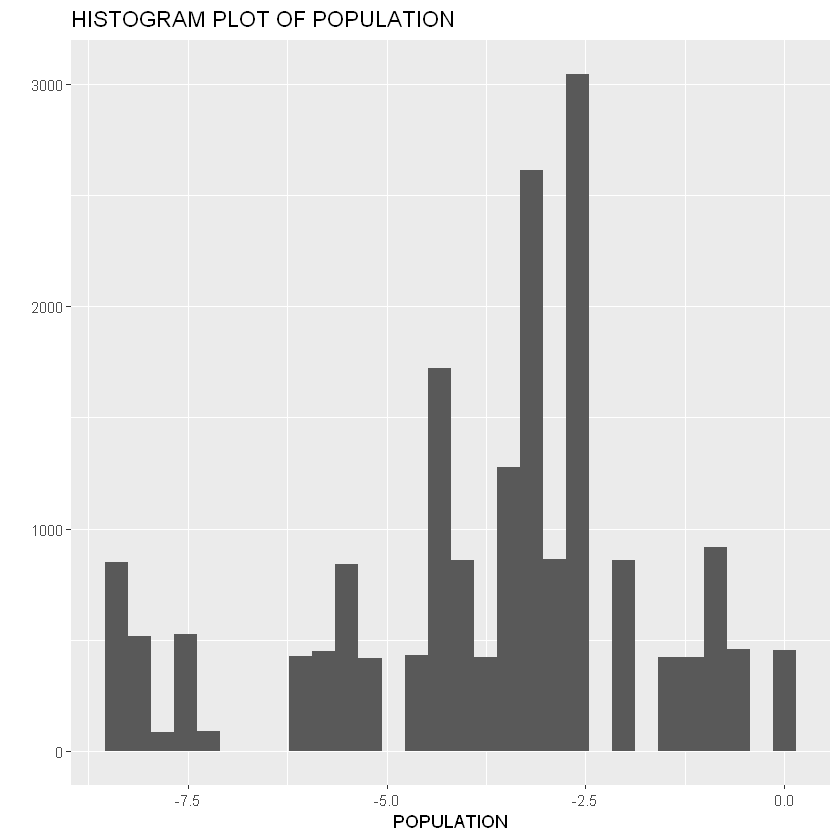

In [31]:

qplot(log(countries_norm$POPULATION), geom ="histogram", xlab= "POPULATION", main = "HISTOGRAM PLOT OF POPULATION")

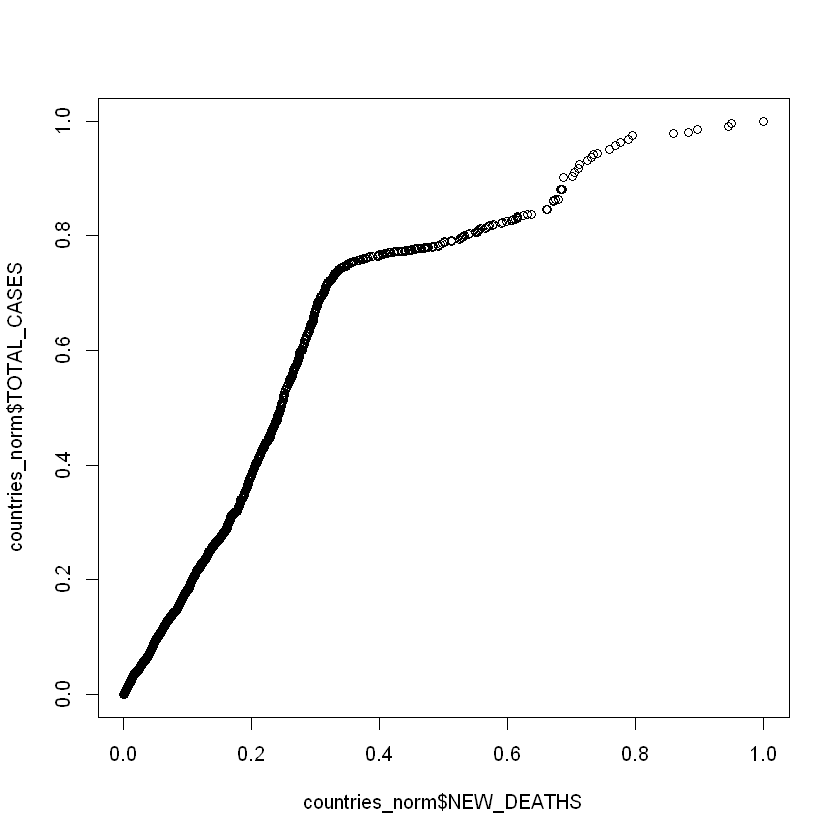

In [32]:
# ASSUMING THAT THE TOTAL DEATH VARIABLE IS A NORMAL DISTRIBUTION,
# IN OTHER TO VISUALLY VERIFY THIS ASSUMPTION,THE Q-Q PLOT IS USED
qqplot(countries_norm$NEW_DEATHS,countries_norm$TOTAL_CASES)

In [33]:
model <- lm(TOTAL_DEATHS~TOTAL_CASES,data= countries_norm)

In [34]:
summary(model)


Call:
lm(formula = TOTAL_DEATHS ~ TOTAL_CASES, data = countries_norm)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.210947 -0.005885 -0.003798 -0.002530  0.264296 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0037945  0.0003108   12.21   <2e-16 ***
TOTAL_CASES 1.0263660  0.0024864  412.79   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04051 on 19405 degrees of freedom
Multiple R-squared:  0.8978,	Adjusted R-squared:  0.8978 
F-statistic: 1.704e+05 on 1 and 19405 DF,  p-value: < 2.2e-16


In [35]:
model_stad<-rstandard(model)

In [37]:
model_stad_df<- cbind(countries_norm,model_stad)

In [39]:
head(model_stad_df)

,DATE,ISO_CODE,CONTINENT,LOCATION,TOTAL_CASES,TOTAL_DEATHS,NEW_CASES,NEW_DEATHS,TOTAL_VACCINATIONS,PEOPLE_VACCINATED,POPULATION,model_stad
,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-02-25,ALB,Europe,Albania,0,0,0,0,0,0,0.01971438,-0.09366429
2,2020-02-26,ALB,Europe,Albania,0,0,0,0,0,0,0.01971438,-0.09366429
3,2020-02-27,ALB,Europe,Albania,0,0,0,0,0,0,0.01971438,-0.09366429
4,2020-02-28,ALB,Europe,Albania,0,0,0,0,0,0,0.01971438,-0.09366429
5,2020-02-29,ALB,Europe,Albania,0,0,0,0,0,0,0.01971438,-0.09366429
6,2020-03-01,ALB,Europe,Albania,0,0,0,0,0,0,0.01971438,-0.09366429


In [41]:
plot(countries_norm$NEW_CASES,model.stad_df)
abline(0,0)

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): object 'model.stad_df' not found
